## PCA
Учитывая, что у нас большое кол-во признаков, и мы не можем их интерпретировать из-за того, что они анонимные, попробуем применить метод главных компонент для уменьшения размерности данных. Возьмём компоненты, объясняющие 80% дисперсии данных.

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [16]:
data_path = "data/cleaned_data.csv"
df = pd.read_csv(data_path)

In [17]:
features_for_pca = df.drop(columns=["rank", "query_id"])

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_for_pca)

In [18]:
pca = PCA()
features_pca = pca.fit_transform(features_scaled)

Визуализируем пару первых компонент.

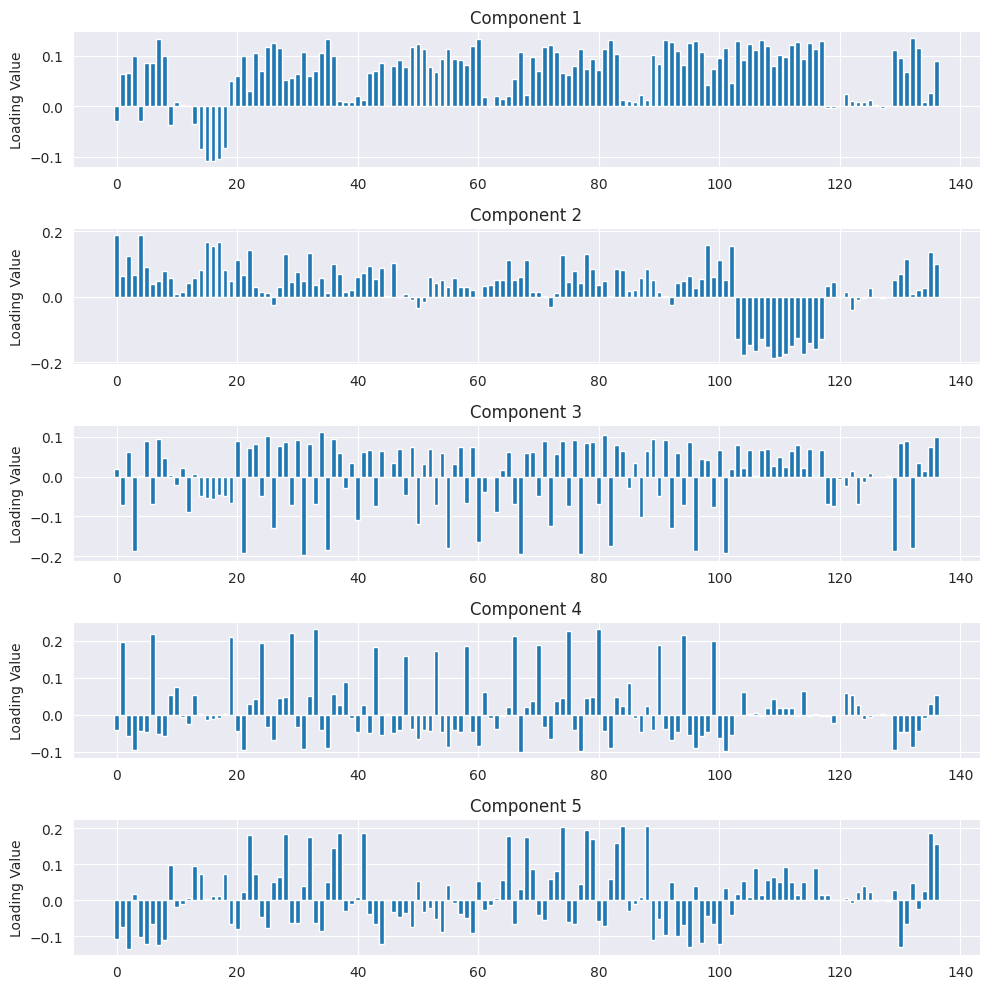

In [19]:
num_components = 5
loadings = pca.components_[:num_components]

fig, axes = plt.subplots(nrows=num_components, figsize=(10, num_components * 2), dpi=100)

for i, ax in enumerate(axes):
    components_loadings = loadings[i]
    ax.bar(range(len(components_loadings)), components_loadings)
    ax.set_title(f"Component {i+1}")
    ax.set_ylabel("Loading Value")

plt.tight_layout()
plt.show()

In [20]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
explained_variance, cumulative_variance

(array([1.82846541e-01, 1.30222040e-01, 7.97723484e-02, 7.78558552e-02,
        6.04854373e-02, 3.92797709e-02, 3.54633847e-02, 3.05471864e-02,
        2.55574104e-02, 2.54503863e-02, 2.35858040e-02, 2.03114810e-02,
        1.83770063e-02, 1.43671966e-02, 1.35932587e-02, 1.32775464e-02,
        1.19966425e-02, 1.12994664e-02, 1.08598409e-02, 9.34042129e-03,
        8.35774476e-03, 8.00490145e-03, 7.68808571e-03, 7.34548681e-03,
        7.31022244e-03, 7.28736244e-03, 6.85911256e-03, 6.81557942e-03,
        6.26847486e-03, 6.19810332e-03, 6.12947592e-03, 5.72775902e-03,
        5.62684427e-03, 5.21034180e-03, 4.82624109e-03, 4.54359338e-03,
        4.07338466e-03, 3.96676455e-03, 3.90631866e-03, 3.39368307e-03,
        3.33093813e-03, 3.02494653e-03, 2.92340758e-03, 2.88518718e-03,
        2.62081354e-03, 2.39665731e-03, 2.10920005e-03, 1.96733576e-03,
        1.91596253e-03, 1.66494290e-03, 1.59878596e-03, 1.40651094e-03,
        1.31345589e-03, 1.21390739e-03, 1.16694316e-03, 1.062938

Первые 20 компонент объясняют 83% дисперсии данных. Попробуем оставить только их.

In [21]:
n_components = 20
new_features = pd.DataFrame(features_pca[:, :n_components], columns=[f"PC{i+1}" for i in range(n_components)])
new_features[["rank", "query_id"]] = df[["rank", "query_id"]]
new_features.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,rank,query_id
0,4.031624,1.933464,-8.964168,-5.980812,1.131865,3.635235,-0.087606,-0.471831,-0.512552,0.932306,...,-0.087328,-0.493672,-1.327264,-1.346950,1.446229,0.465192,0.712098,-0.956940,0,10
1,-0.043029,2.366047,3.811929,-1.038765,-2.034367,-0.323580,0.517958,0.645321,0.323084,-0.192914,...,2.389113,0.443049,-0.344942,-0.645254,0.093837,-1.094152,0.500341,0.327576,1,10
2,-2.477877,1.287113,2.141071,-0.579505,-1.604713,-0.724317,-0.549902,1.216274,0.206812,0.135684,...,0.410139,0.528211,0.016056,-0.883072,0.541253,0.257560,0.743918,-0.160572,0,10
3,-0.058892,1.279461,3.690945,-1.686791,-3.815199,1.505603,-0.924479,0.230705,1.324154,-0.379574,...,0.432667,-0.293796,-0.111674,-0.052568,-0.077857,-0.648236,-0.016126,0.913939,1,10
4,3.014263,3.068484,0.351022,-3.721790,-2.622191,1.419503,1.766019,1.851164,-0.981608,0.593432,...,-1.019592,-1.984843,0.336456,0.303509,-0.596985,-0.526605,-0.669424,0.621680,2,10


In [22]:
new_features.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,rank,query_id
count,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,...,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,235258.000000,235258.000000
mean,3.807957e-16,-3.092757e-17,1.140454e-16,-6.668757e-17,-8.505081e-17,-2.899459e-17,8.215135e-17,2.367892e-17,4.808270e-17,-3.382703e-18,...,-2.585351e-17,4.759946e-17,2.899459e-18,-1.026892e-17,-9.664865e-19,-2.826973e-17,-6.765405e-17,1.739676e-17,0.677869,14828.413401
std,5.005006e+00,4.223801e+00,3.305882e+00,3.265930e+00,2.878635e+00,2.319774e+00,2.204202e+00,2.045723e+00,1.871198e+00,1.867275e+00,...,1.586714e+00,1.402966e+00,1.364655e+00,1.348715e+00,1.282009e+00,1.244200e+00,1.219756e+00,1.131213e+00,0.830033,8193.945170
min,-4.425804e+01,-8.580035e+00,-8.254244e+01,-4.420070e+01,-6.660652e+01,-4.235262e+01,-2.139295e+01,-1.263097e+02,-7.289464e+01,-7.608610e+01,...,-3.854774e+01,-1.039033e+02,-1.167781e+02,-7.484916e+01,-8.962142e+01,-4.306846e+01,-9.565032e+01,-1.025258e+02,0.000000,10.000000
25%,-3.573511e+00,-2.656768e+00,-2.086361e+00,-1.852030e+00,-1.580021e+00,-1.297601e+00,-1.035003e+00,-7.839544e-01,-7.107851e-01,-4.993837e-01,...,-1.018218e+00,-5.855355e-01,-5.923857e-01,-5.674287e-01,-5.331293e-01,-7.146347e-01,-5.490683e-01,-3.193864e-01,0.000000,8215.000000
50%,-4.176351e-01,-2.966770e-01,-3.286615e-02,-2.757418e-01,-1.735059e-01,-2.453656e-01,-5.040221e-02,2.413262e-01,9.427898e-02,1.617998e-01,...,-8.331466e-02,1.064920e-02,4.426949e-02,-3.012489e-03,7.100851e-02,-6.088828e-02,-3.048326e-03,6.207975e-02,0.000000,14935.000000
75%,2.875553e+00,2.247294e+00,2.150620e+00,1.188478e+00,1.446454e+00,1.005526e+00,9.618248e-01,1.119902e+00,9.184329e-01,6.721588e-01,...,9.217348e-01,5.933863e-01,6.117356e-01,5.456662e-01,6.031564e-01,6.417878e-01,5.564414e-01,4.266967e-01,1.000000,21580.000000
max,9.060886e+01,3.389715e+02,1.516803e+02,2.379312e+02,3.763537e+02,6.831172e+01,3.223861e+02,1.336828e+02,2.577186e+02,3.871382e+02,...,8.419617e+01,1.476931e+02,1.543301e+02,1.298908e+02,9.506629e+01,7.885281e+01,1.234803e+02,1.302354e+02,4.000000,29995.000000


In [23]:
# save the new features
new_features.to_csv(f"data/pca_{n_components}_features.csv", index=False)